# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Help funtion for formating text
def colored_bold_text(text, bold=True, color="red"):
    # List of allowed colors
    color_list = ['red', 'green', 'yellow', 'blue', 'purple', 'teal', 'grey']
    
    # Validate the color argument
    if color not in color_list:
        print(f"Error: 'color' has to be one of {color_list}")
        return  # Exit the function if the color is invalid

    # Define ANSI escape codes for colors and bold text
    color_codes = {
        'red': '\033[31m',
        'green': '\033[32m',
        'yellow': '\033[33m',
        'blue': '\033[34m',
        'purple': '\033[35m',
        'teal': '\033[36m',
        'grey': '\033[90m',
    }
    
    bold_code = '\033[1m' if bold else ''
    reset_code = '\033[0m'
    
    # Get the ANSI code for the chosen color
    color_code = color_codes[color]
    
    # Format the text
    formatted_text = f"{bold_code}{color_code}{text}{reset_code}"
    print(formatted_text)


## Loading the Data
To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [3]:
# Spiecies
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [4]:
# Observations
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Overview
Let's check the basic information about both dataframes

In [5]:
# Species
colored_bold_text("Spiecies Basic Info:", color="green")
species.info()

Spiecies Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
# Obsercations
colored_bold_text("Observations Basic Info:", color="green")
observations.info()

Observations Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [7]:
# Shape of the datasets:
colored_bold_text("species shape:", color="green")
print(species.shape)
colored_bold_text("observations shape:", color="green")
print(observations.shape)


species shape:
(5824, 4)
observations shape:
(23296, 3)


## Explore the Data

First let's check if the Datasets are clean or need to be cleaned

In [8]:
# Species
print(species.nunique())

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


In [9]:
# Observations
print(observations.nunique())

scientific_name    5541
park_name             4
observations        304
dtype: int64


**Conclusions**

- It seems that the `scientific names` and `common names` do not match the DataFrame length of `5824`.
- Observations were made in `4 Parks`.
- It appears that all species with the given `scientific_name` were observed, or the value is `0`.


### Handling Duplicates

In [10]:
species.isnull().nunique()

category               1
scientific_name        1
common_names           1
conservation_status    2
dtype: int64

In [11]:
duplicates = species[species.scientific_name.duplicated(keep=False)].sort_values(by='scientific_name')
duplicates

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",NaN
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,NaN
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",NaN
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,NaN
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",NaN
3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",NaN


In [12]:
# Checking if the duplicates have diffierent conservation_status
list_of_duplicates = duplicates.scientific_name.unique()

for dpl in list_of_duplicates:
    temp_df = duplicates[duplicates.scientific_name == dpl]
    if temp_df.conservation_status.nunique() > 1:
        print(f'Spiecies: {dpl} have different conservation status')
    

Spiecies: Canis lupus have different conservation status


It seems that there are 557 rows in the DataFrame `species` containing duplicated `scientific_name` entries. Since only the `conservation_status` contains important information, the rest of the duplicates can be dropped, except for `canis lubus`, which has different `conservation_status` values in the duplicated rows.

In [13]:
species_cleaned = species[species['scientific_name'] != 'Canis lupus'].drop_duplicates(subset=['scientific_name'])
species_cleaned.shape

(5540, 4)

In [14]:
species[species['scientific_name'] == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


We will keep only the last row. It is assumed, that that is the last input and it is up to date.

In [15]:
species_cleaned = pd.concat([species_cleaned, species.loc[[4448]]],ignore_index=True)
species_cleaned.shape

(5541, 4)

In [16]:
duplicates = species_cleaned[species_cleaned.scientific_name.duplicated(keep=False)].sort_values(by='scientific_name')
duplicates

,category,scientific_name,common_names,conservation_status


### Handling missing values

In [17]:
def clean_data(species_cleaned):
    # Replace missing values with "No Concern" in column: 'conservation_status'
    species_cleaned = species_cleaned.fillna({'conservation_status': "No Concern"})
    return species_cleaned

species_cleaned = clean_data(species_cleaned.copy())
species_cleaned.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern
1,Mammal,Bos bison,"American Bison, Bison",No Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern


In [18]:
observations.isna().nunique()

scientific_name    1
park_name          1
observations       1
dtype: int64

## Analysis

Let's check how many species are in each category

In [19]:
species_by_category = (species_cleaned.groupby(['category'])
                                    .agg(scientific_name_count=('scientific_name', 'count'))
                                    .reset_index()
                                    )
species_by_category

,category,scientific_name_count
0,Amphibian,79
1,Bird,488
2,Fish,125
3,Mammal,176
4,Nonvascular Plant,333
5,Reptile,78
6,Vascular Plant,4262


Now let's check how the distribution of the endangered species is in each of the categories.

In [20]:
# Performed 1 aggregation grouped on column: 'category'
species_category_endangered = (species_cleaned.groupby(['conservation_status','category'])
                                            .agg(scientific_name_count=('scientific_name', 'count'))
                                            .unstack()
                                            )
species_category_endangered

scientific_name_count                       \
category                        Amphibian   Bird   Fish Mammal   
conservation_status                                              
Endangered                            1.0    4.0    3.0    6.0   
In Recovery                           NaN    3.0    NaN    NaN   
No Concern                           72.0  413.0  115.0  146.0   
Species of Concern                    4.0   68.0    4.0   22.0   
Threatened                            2.0    NaN    3.0    2.0   

                                                              
category            Nonvascular Plant Reptile Vascular Plant  
conservation_status                                           
Endangered                        NaN     NaN            1.0  
In Recovery                       NaN     NaN            NaN  
No Concern                      328.0    73.0         4216.0  
Species of Concern                5.0     5.0           43.0  
Threatened                        NaN     NaN            2.0

In [21]:
# Performed 1 aggregation grouped on column: 'category'
species_category_endangered = (species_cleaned.groupby(['conservation_status','category'])
                                            .agg(scientific_name_count=('scientific_name', 'count'))
                                            .reset_index()
                                            )
species_category_endangered

,conservation_status,category,scientific_name_count
0,Endangered,Amphibian,1
1,Endangered,Bird,4
2,Endangered,Fish,3
3,Endangered,Mammal,6
4,Endangered,Vascular Plant,1
5,In Recovery,Bird,3
6,No Concern,Amphibian,72
7,No Concern,Bird,413
8,No Concern,Fish,115
9,No Concern,Mammal,146


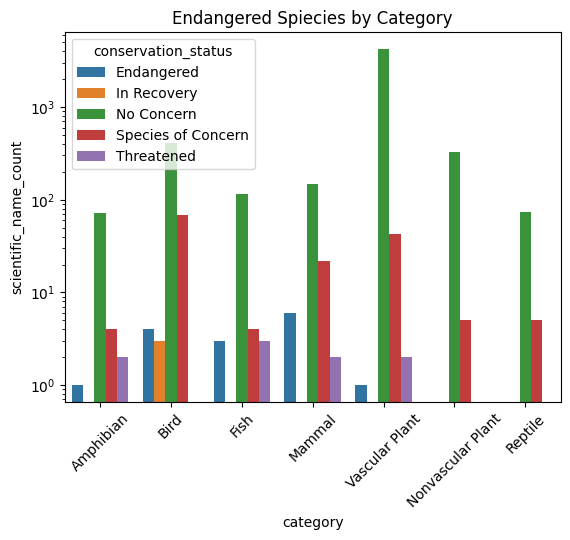

In [22]:
ax = sns.barplot(species_category_endangered, x='category', y='scientific_name_count', hue=species_category_endangered['conservation_status'])
ax.set_yscale('log')
plt.xticks(rotation=45)
plt.title('Endangered Spiecies by Category')
plt.show()

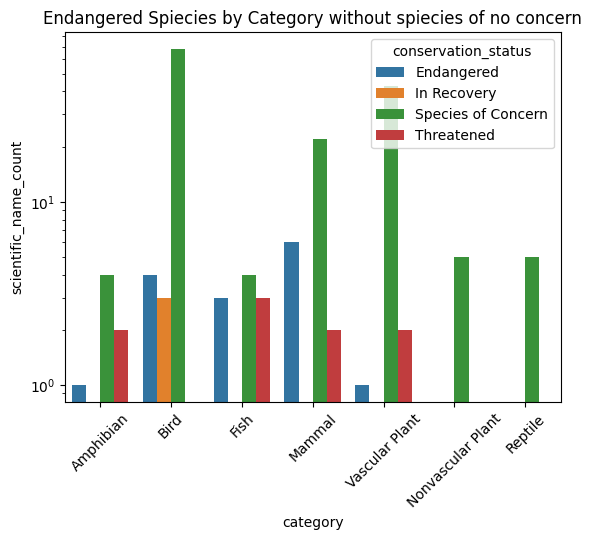

In [23]:
# Create the barplot with specified hue order
ax = sns.barplot(
    data=species_category_endangered[species_category_endangered['conservation_status'] != 'No Concern'],
    x='category',
    y='scientific_name_count',
    hue='conservation_status')


ax.set_yscale('log')
plt.xticks(rotation=45)
plt.title('Endangered Spiecies by Category without spiecies of no concern')
plt.show()


Now let's check which species were most often observed.

In [24]:
observations_count_by_species = (observations.groupby('scientific_name')
                                            .agg(times_observed=('observations', 'sum'))
                                            .reset_index()
                                            .sort_values(by='times_observed', ascending=False)
                                            )
observations_count_by_species


,scientific_name,times_observed
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780
1103,Castor canadensis,1725
2555,Hypochaeris radicata,1720
4179,Puma concolor,1711
...,...,...
4247,Rana sierrae,144
3394,Noturus baileyi,143
5356,Vermivora bachmanii,141
805,Canis rufus,137


Let's see how many observations were made in each park

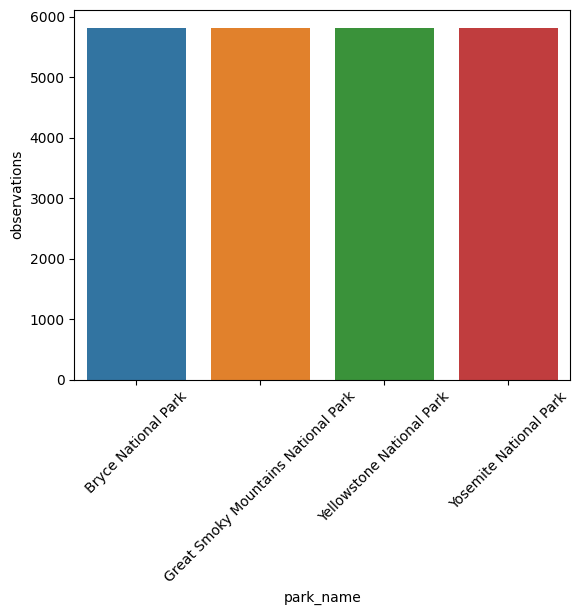

In [25]:
observations_by_park = (observations.groupby(['park_name'])
                                    .count()
                                    .reset_index()
                                    )
sns.barplot(observations_by_park, x='park_name',hue='park_name', y='observations')
plt.xticks(rotation=45)
plt.show()

Check if some species were not observed, hence the `observations` are equal to 0

In [26]:
observations[observations['observations'] == 0]

,scientific_name,park_name,observations


Let's investigate how many unique species were observed in each park

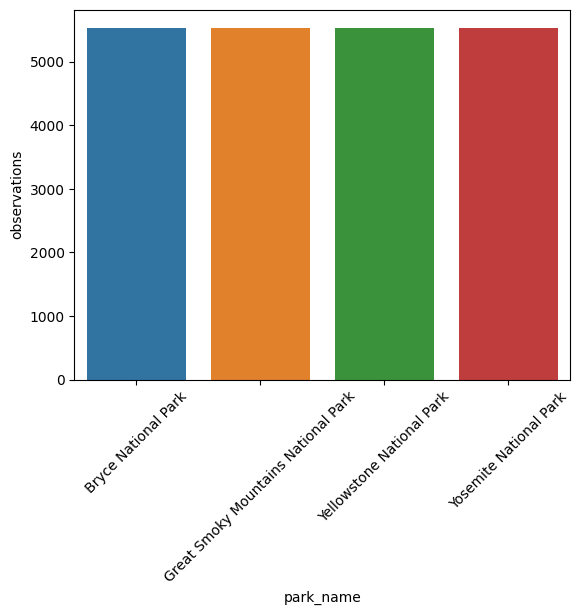

In [27]:
observations_by_park_unique = (observations.groupby(['park_name'])
                                    .agg(observations=('scientific_name','nunique'))
                                    .reset_index()
                                    )
sns.barplot(observations_by_park_unique, x='park_name',hue='park_name', y='observations')
plt.xticks(rotation=45)
plt.show()

In [28]:
observations_by_park

,park_name,scientific_name,observations
0,Bryce National Park,5824,5824
1,Great Smoky Mountains National Park,5824,5824
2,Yellowstone National Park,5824,5824
3,Yosemite National Park,5824,5824


In [29]:
observations_by_park_unique

,park_name,observations
0,Bryce National Park,5541
1,Great Smoky Mountains National Park,5541
2,Yellowstone National Park,5541
3,Yosemite National Park,5541


It seems that all the species were observed in all four parks during the seven-day period, and the same number of observations were made in all four parks.



In [30]:
species_cleaned.groupby("conservation_status").size().sort_values(ascending=False)

conservation_status
No Concern            5363
Species of Concern     151
Endangered              15
Threatened               9
In Recovery              3
dtype: int64

Which species were most often observed in each park?

In [31]:
# Assuming 'observations' contains a column 'observations' with the number of observations per entry
observations_sum = (observations.groupby(['park_name', 'scientific_name'])
                    .agg(observations_sum=('observations', 'sum'))  # Sum the counts of observations
                    .reset_index()
                    )

# To find the species with the most observations in each park
most_observed = (observations_sum.loc[observations_sum.groupby('park_name')['observations_sum'].idxmax()]
                .reset_index(drop=True)
                )

most_observed


,park_name,scientific_name,observations_sum
0,Bryce National Park,Columba livia,339
1,Great Smoky Mountains National Park,Streptopelia decaocto,256
2,Yellowstone National Park,Holcus lanatus,805
3,Yosemite National Park,Hypochaeris radicata,505


For a deeper investigation, two datasets need to be merged.

In [32]:
df = pd.merge(left=observations,
            right=species_cleaned,
            left_on='scientific_name',
            right_on='scientific_name',
            how='left')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Concern


Let's check the distribution of endangered species in the Parks

([0, 1, 2, 3],
 [Text(0, 0, 'Bryce National Park'),
  Text(1, 0, 'Great Smoky Mountains National Park'),
  Text(2, 0, 'Yellowstone National Park'),
  Text(3, 0, 'Yosemite National Park')])

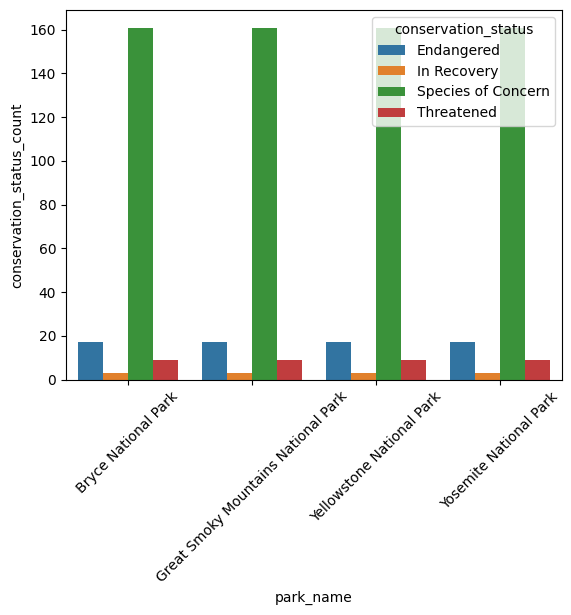

In [33]:
count_endeangered_in_parks = df.groupby(['park_name','conservation_status'])\
                        .agg(conservation_status_count=('conservation_status', 'count'))\
                        .reset_index()
sns.barplot(count_endeangered_in_parks.where(count_endeangered_in_parks['conservation_status'] != 'No Concern'),
            x='park_name',
            y='conservation_status_count',
            hue='conservation_status')
plt.xticks(rotation=45)

### Analasys of the endangerment

Next, I will look into whether some species are more likely to need conservation and if the differences between species and their conservation status matter.


First, to see if certain types of species need conservation more than others, I will add a new column in the species data called is_protected. This column will count the species that have any value other than No Intervention in their conservation status.

In [39]:
species_cleaned["is_protected"] = species_cleaned['conservation_status'] != "No Concern"
species_cleaned.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Concern,False
1,Mammal,Bos bison,"American Bison, Bison",No Concern,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Concern,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Concern,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Concern,False


For this new column, False indicates that the species does not have any conservation status, while True signifies that it does have some form of conservation status. To gain a clearer understanding of how many species are protected versus those that are not, I will count the occurrences grouped by scientific name and category. I will create a new table called protected_count.

In [42]:
protected_count = (
    species_cleaned.groupby(["category", "is_protected"])
    .scientific_name.nunique()
    .reset_index()
)

protected_count = protected_count.pivot(index="category", columns="is_protected", values="scientific_name")\
                    .reset_index()
                    
protected_count.columns.name = None  # Remove the column name (which is a MultiIndex)
protected_count = protected_count.rename(columns={False: "not_protected", True: "protected"})
protected_count


,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,10
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Text(0.5, 1.0, 'Protected vs. Not protected Species by Category')

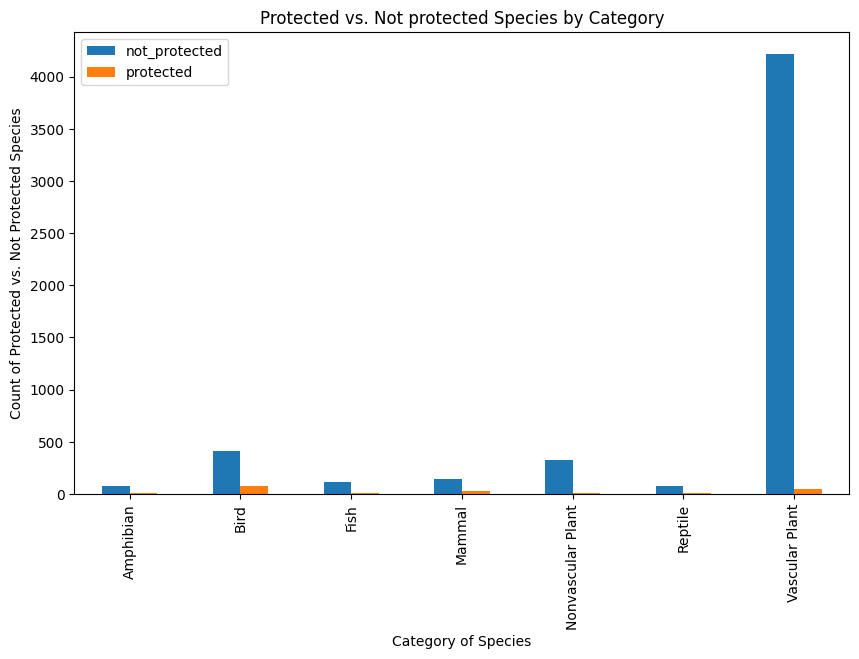

In [43]:
ax = protected_count.plot(kind = "bar", stacked = False, figsize = (10,6))
ax.set_xticks(range(len(protected_count.category)))
ax.set_xticklabels(protected_count.category)
ax.set_xlabel("Category of Species")
ax.set_ylabel("Count of Protected vs. Not Protected Species")
plt.title("Protected vs. Not protected Species by Category")